In [1]:
### Import preprocessing libraries

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn


In [2]:
### Import libraries for neural models
from numpy.random import seed
seed(42)
import tensorflow
tensorflow.keras.__version__
import tensorflow as tf

In [3]:
# Read in DataSet and clean nan inputs
starOrignialDF= pd.read_csv('pulsarStarData.csv', encoding = 'utf8')
starOrignialDF.dropna()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [4]:
# Rename target column for prediction
starOrignialDF.rename(columns={'target_class': 'Pulsar_Star'}, inplace=True)
starOrignialDF

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Pulsar_Star
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [5]:
starOrignialDF.dtypes

Mean of the integrated profile                   float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
Pulsar_Star                                        int64
dtype: object

In [6]:
valueCountALL = starOrignialDF["Pulsar_Star"].value_counts()
valueCountALL

0    16259
1     1639
Name: Pulsar_Star, dtype: int64

In [7]:
totalList = len(starOrignialDF["Pulsar_Star"])
totalList 

17898

In [8]:
allPulsarRatio = ((valueCountALL / totalList)*100).round(1).astype(str) + '%' 
allPulsarRatio

0    90.8%
1     9.2%
Name: Pulsar_Star, dtype: object

In [9]:
allPulsarAGG_prettyDF =pd.DataFrame({"Total Pulsar Star":valueCountALL,"Percentage Pulsar Star":allPulsarRatio})
allPulsarAGG_prettyDF.index = ["Not Pulsar Star","Pulsar Star"]
print(' AGGREGATED Actual Pulsar Star DataFrame')
print('_________________________________________')
allPulsarAGG_prettyDF

 AGGREGATED Actual Pulsar Star DataFrame
_________________________________________


,Total Pulsar Star,Percentage Pulsar Star
Not Pulsar Star,16259,90.8%
Pulsar Star,1639,9.2%


In [10]:
X = starOrignialDF.drop("Pulsar_Star", axis=1)
y = starOrignialDF["Pulsar_Star"]
print(X.shape, y.shape)

(17898, 8) (17898,)


In [11]:
# Start Preprocess specific imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [12]:
# Split data to train and test 80:20 ratio for optimal results
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2)

In [13]:
# Scale data for easier computing
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
 # Set Labels to numerical then binary  matrix
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [15]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)


In [16]:
# Imports for Neural Network Model
import h5py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
# Create model and add layers
# Hidden node max: input variables * 3
# Number of hidden layers adjust based on not overfitting
# Output 2 (binary) 
model = Sequential()
model.add(Dense(units=24, activation='relu', input_dim=8))
model.add(Dense(units=24, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [18]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                216       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 50        
Total params: 866
Trainable params: 866
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Train the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=20,
    shuffle=True,
    verbose=2
)


Train on 14318 samples
Epoch 1/20
14318/14318 - 1s - loss: 0.1756 - accuracy: 0.9533
Epoch 2/20
14318/14318 - 0s - loss: 0.0882 - accuracy: 0.9739
Epoch 3/20
14318/14318 - 0s - loss: 0.0850 - accuracy: 0.9749
Epoch 4/20
14318/14318 - 0s - loss: 0.0831 - accuracy: 0.9752
Epoch 5/20
14318/14318 - 0s - loss: 0.0822 - accuracy: 0.9754
Epoch 6/20
14318/14318 - 0s - loss: 0.0808 - accuracy: 0.9763
Epoch 7/20
14318/14318 - 0s - loss: 0.0803 - accuracy: 0.9765
Epoch 8/20
14318/14318 - 0s - loss: 0.0795 - accuracy: 0.9763
Epoch 9/20
14318/14318 - 0s - loss: 0.0789 - accuracy: 0.9769
Epoch 10/20
14318/14318 - 0s - loss: 0.0789 - accuracy: 0.9761
Epoch 11/20
14318/14318 - 0s - loss: 0.0775 - accuracy: 0.9776
Epoch 12/20
14318/14318 - 0s - loss: 0.0772 - accuracy: 0.9770
Epoch 13/20
14318/14318 - 0s - loss: 0.0769 - accuracy: 0.9770
Epoch 14/20
14318/14318 - 0s - loss: 0.0766 - accuracy: 0.9776
Epoch 15/20
14318/14318 - 0s - loss: 0.0759 - accuracy: 0.9771
Epoch 16/20
14318/14318 - 0s - loss: 0.07

In [20]:
print(f"Neural Network Loss and Accuracy Results")
print('-----------------------')
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)

Neural Network Loss and Accuracy Results
-----------------------
3580/3580 - 0s - loss: 0.0695 - accuracy: 0.9785


In [21]:
# SAFE MODEL!!!
 model.save("PulsarStar_NN_Model.h5")

In [22]:
# RELOAD!!!!! MODEL!!! YAYYYYY!!
from tensorflow.keras.models import load_model

model = load_model("PulsarStar_NN_Model.h5")

In [23]:
print(f"Better Check that Normal Neural Network!! Twice! ")
print('-------------------------------------------------')
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)

Better Check that Normal Neural Network!! Twice! 
-------------------------------------------------
3580/3580 - 0s - loss: 0.0695 - accuracy: 0.9785


In [24]:
# Predict Pulsar Star Outcomes
encoded_predictions = model.predict_classes(X_test_scaled[:])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [25]:
print(f"DEFAULT OUTCOME KEY: (Pulsar YES: 1 , Pulsar NO: 0 )")
print(f"------------------------------------------------------")
print(f"Predicted Outcome: {prediction_labels}")
print(f"Actual Outcome: {list(y_test[:])}")

DEFAULT OUTCOME KEY: (Pulsar YES: 1 , Pulsar NO: 0 )
------------------------------------------------------
Predicted Outcome: [0 1 0 ... 0 0 1]
Actual Outcome: [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0

In [26]:
#SAVE VARIABLES TO PLOT 
X_predict = prediction_labels
Actual_Outcome= list(y_test[:])

In [27]:
pulsarStarDF =pd.DataFrame({"Pulsar_Prediction": X_predict, "Actual_Pulsar ": Actual_Outcome}).reset_index(drop=True)
pulsarStarDF.head()


,Pulsar_Prediction,Actual_Pulsar
0,0,0
1,1,1
2,0,0
3,0,1
4,0,0


In [28]:
statusValueCount =pulsarStarDF["Pulsar_Prediction"].value_counts()
statusValueCount

0    3296
1     284
Name: Pulsar_Prediction, dtype: int64

In [29]:
totalStatusOutcome = len(pulsarStarDF["Pulsar_Prediction"])
totalStatusOutcome

3580

In [30]:
statusOutcomeRatio = statusValueCount/ totalStatusOutcome
statusOutcomeRatio

0    0.92067
1    0.07933
Name: Pulsar_Prediction, dtype: float64

In [31]:
statusRatio_df =pd.DataFrame({"Total Predictive Outcomes":statusValueCount,"Percentage Predictive Outcomes":statusOutcomeRatio})
statusRatio_df

,Total Predictive Outcomes,Percentage Predictive Outcomes
0,3296,0.92067
1,284,0.07933


In [32]:
statusRatio_df.index = ["Not Pulsar Star","Pulsar Star"]
statusRatio_df

,Total Predictive Outcomes,Percentage Predictive Outcomes
Not Pulsar Star,3296,0.92067
Pulsar Star,284,0.07933


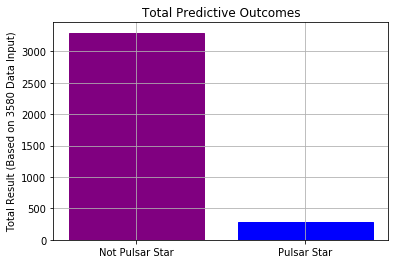

In [33]:
statusLabel =["Not Pulsar Star","Pulsar Star"]

totals= statusRatio_df['Total Predictive Outcomes']

barList = plt.bar(statusLabel,totals)
#colors 
barList[0].set_color('purple')
barList[1].set_color('b')
# Orient widths. Add labels, tick marks, etc. 
# plt.yticks(np.arange(0,200,50))
plt.title("Total Predictive Outcomes")
plt.ylabel("Total Result (Based on 3580 Data Input)")
plt.grid()

# # Save the Figure
# plt.savefig("SimpleBar.png")

# Show the Figure
plt.show()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

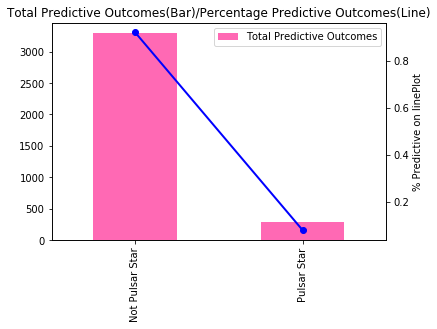

In [34]:
# two y-axes, using twinx()

import matplotlib.pyplot as plt
fig = plt.figure()
ax = statusRatio_df[["Total Predictive Outcomes"]].plot(kind='bar',color= "hotpink", use_index=True)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         statusRatio_df[["Percentage Predictive Outcomes"]].values,
         linestyle='-',
         marker='o', linewidth=2.0,color= "blue")
# Orient widths. Add labels, tick marks, etc. 

plt.title("Total Predictive Outcomes(Bar)/Percentage Predictive Outcomes(Line)")
plt.xlabel("Not Pulsar Star: 0, Pulsar Star: 1")
plt.ylabel("% Predictive on linePlot")
plt.xticks(rotation=180)

In [35]:
# Make the Aggregated DataFrame Pretty
statusOutcomeRatio_asObject = ((statusValueCount/ totalStatusOutcome)*100).round(1).astype(str) + '%' 
statusOutcomeRatio_asObject

0    92.1%
1     7.9%
Name: Pulsar_Prediction, dtype: object

In [36]:
statusRatio_prettyDF =pd.DataFrame({"Total Predictive Outcomes":statusValueCount,"Percentage Predictive Outcomes":statusOutcomeRatio_asObject})


print('                 AGGREGATED PREDICTIVE OUTCOMES DataFrame')
print('                _________________________________________')
statusRatio_prettyDF

                 AGGREGATED PREDICTIVE OUTCOMES DataFrame
                _________________________________________


,Total Predictive Outcomes,Percentage Predictive Outcomes
0,3296,92.1%
1,284,7.9%


In [37]:
statusRatio_prettyDF.index = ["Not Pulsar Star","Pulsar Star"]
statusRatio_prettyDF

,Total Predictive Outcomes,Percentage Predictive Outcomes
Not Pulsar Star,3296,92.1%
Pulsar Star,284,7.9%


In [38]:
percentagesComparison_DF =pd.DataFrame({
                    "Percentage Predictive Outcomes":statusOutcomeRatio_asObject,
                    "Percentage Original Pulsar Star":allPulsarRatio


})
percentagesComparison_DF.index = ["Not Pulsar Star","Pulsar Star"]
percentagesComparison_DF

,Percentage Predictive Outcomes,Percentage Original Pulsar Star
Not Pulsar Star,92.1%,90.8%
Pulsar Star,7.9%,9.2%


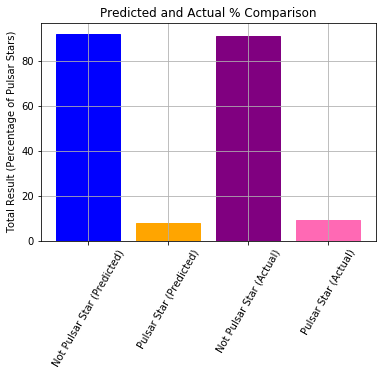

In [39]:
statusLabel =["Not Pulsar Star (Predicted)","Pulsar Star (Predicted)", "Not Pulsar Star (Actual)","Pulsar Star (Actual)"]

totals= 92.0,8.0,90.8,9.2

barList = plt.bar(statusLabel,totals)
#colors 
barList[0].set_color('blue')
barList[1].set_color('orange')
barList[2].set_color('purple')
barList[3].set_color('hotpink')
# Orient widths. Add labels, tick marks, etc. 
# plt.yticks(np.arange(0,200,50))
plt.title("Predicted and Actual % Comparison")
plt.ylabel("Total Result (Percentage of Pulsar Stars)")
plt.grid()
plt.xticks(rotation=60)
# # Save the Figure
# plt.savefig("PercentageBar.png")

# Show the Figure
plt.show()

In [40]:
# pulsarStarDF["Accuracy"] =""
# pulsarStarDF

In [41]:
# def Accuracy(c):
#     if c['Pulsar_Prediction'] | c['Actual_Pulsar']>= 1:
#         return 'Accurate Prediction (Pulsar)'
#     elif c['Pulsar_Prediction'] | c['Actual_Pulsar']<= 0:
#         return 'Accurate Prediction (Not a Pulsar)'
#     if c['Pulsar_Prediction']== 1 | c['Actual_Pulsar']== 0:
#         return 'False Predition Yes (not a Pulsar)'
#     elif c['Pulsar_Prediction']== 0 | c['Actual_Pulsar']== 1 :
#         return 'False Predition No (Pulsar)'
#     else:
#         return 'Pending'

In [42]:
# pulsarStarDF["Accuracy"]  = pulsarStarDF.apply(Accuracy,axis=1)
# pulsarStarDF.head(10)

In [43]:
### What I couldn't accomplish with this ForLoop, I did so with Matrix_Confusion print_stats()
### in the PulsarStar_RandomForest notebook.
